In [1]:
#The basics
import pandas as pd
import numpy as np
import json

#Plotting
import matplotlib.pyplot as plt
import FCPython 

#Statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Decide which league to load
#Wyscout data from https://figshare.com/collections/Soccer_match_event_dataset/4415000/2
with open(r"C:\Users\santo\Downloads\BayernMunich2024.json") as f:
    data = json.load(f)

In [2]:
train = pd.DataFrame(data)
train.head(1)

,id,event_id,minute,second,team_id,player_id,x,y,end_x,end_y,...,blocked_y,goal_mouth_z,goal_mouth_y,is_shot,card_type,is_goal,type_display_name,outcome_type_display_name,period_display_name,tags
0,2593441553,3,0,0,37,125883,50.1,49.5,36.1,46.3,...,NaN,NaN,NaN,FALSE,FALSE,0,Pass,Successful,FirstHalf,"[{'id': 1801}, {'id': None}, {'id': None}, {'i..."


In [3]:
train.fillna(0, inplace=True)

In [4]:
train.head()

,id,event_id,minute,second,team_id,player_id,x,y,end_x,end_y,...,blocked_y,goal_mouth_z,goal_mouth_y,is_shot,card_type,is_goal,type_display_name,outcome_type_display_name,period_display_name,tags
0,2593441553,3,0,0,37,125883,50.1,49.5,36.1,46.3,...,0.0,0.0,0.0,FALSE,FALSE,0,Pass,Successful,FirstHalf,"[{'id': 1801}, {'id': None}, {'id': None}, {'i..."
1,2593441561,4,0,1,37,283323,36.3,44.2,39.4,10.3,...,0.0,0.0,0.0,FALSE,FALSE,0,Pass,Successful,FirstHalf,"[{'id': 1801}, {'id': None}, {'id': None}, {'i..."
2,2593441609,5,0,3,37,349932,39.4,10.3,23.7,23.2,...,0.0,0.0,0.0,FALSE,FALSE,0,Pass,Successful,FirstHalf,"[{'id': 1801}, {'id': None}, {'id': None}, {'i..."
3,2593441661,6,0,6,37,320374,22.0,27.2,20.0,73.1,...,0.0,0.0,0.0,FALSE,FALSE,0,Pass,Successful,FirstHalf,"[{'id': 1801}, {'id': None}, {'id': None}, {'i..."
4,2593441737,7,0,8,37,370912,20.8,74.5,28.0,87.1,...,0.0,0.0,0.0,FALSE,FALSE,0,Pass,Successful,FirstHalf,"[{'id': 1801}, {'id': None}, {'id': None}, {'i..."


In [5]:
pd.unique(train['type_display_name'])
shots=train[train['type_display_name']=='Shot']
shots_model=pd.DataFrame(columns=['Goal','x','y'])

In [6]:
shots.head()

,id,event_id,minute,second,team_id,player_id,x,y,end_x,end_y,...,blocked_y,goal_mouth_z,goal_mouth_y,is_shot,card_type,is_goal,type_display_name,outcome_type_display_name,period_display_name,tags
19,2593442291,18,0,36,37,29809,93.5,50.7,0.0,0.0,...,49.6,25.3,50.3,TRUE,FALSE,0,Shot,Successful,FirstHalf,"[{'id': 1801}, {'id': None}, {'id': None}, {'i..."
53,2593444847,21,2,37,109,226599,73.0,61.2,0.0,0.0,...,0.0,98.6,60.7,TRUE,FALSE,0,Shot,Successful,FirstHalf,"[{'id': None}, {'id': None}, {'id': None}, {'i..."
79,2593446413,54,3,51,37,29809,98.0,46.4,0.0,0.0,...,0.0,3.2,49.0,1,0,1,Shot,Successful,FirstHalf,"[{'id': 703}, {'id': 1801}, {'id': None}, {'id..."
135,2593450485,90,7,26,37,320374,92.0,50.1,0.0,0.0,...,64.1,6.9,72.6,TRUE,FALSE,0,Shot,Successful,FirstHalf,"[{'id': 1802}, {'id': None}, {'id': None}, {'i..."
141,2593451291,94,8,8,37,248010,92.4,37.1,0.0,0.0,...,0.0,54.2,49.6,TRUE,FALSE,0,Shot,Successful,FirstHalf,"[{'id': 1401}, {'id': 1802}, {'id': None}, {'i..."


In [12]:
for i, shot in shots.iterrows():

    header = 0
    for shottags in shot['tags']:
        if shottags['id'] == 403:
            header = 1

    # Only include non-headers
    if not(header):        
        shots_model.at[i, 'x'] = 100 - shot['x']
        shots_model.at[i, 'y'] = shot['y']
        shots_model.at[i, 'C'] = abs(shot['y'] - 50)

        # Distance in metres and shot angle in radians.
        x = shots_model.at[i, 'x'] * 105 / 100
        y = shots_model.at[i, 'C'] * 65 / 100
        shots_model.at[i, 'Distance'] = np.sqrt(x**2 + y**2)
        a = np.arctan(7.32 * x / (x**2 + y**2 - (7.32/2)**2))
        if a < 0:
            a = np.pi + a
        shots_model.at[i, 'Angle'] = a

        # Set 'Goal' to 1 for all shots
        shots_model.at[i, 'Goal'] = 1 if shot['is_goal'] == 1 else 0



In [13]:
shots_model

,Goal,x,y,C,Distance,Angle
79,1,2.0,46.4,3.6,3.144137,1.795285
224,1,10.3,41.8,8.2,12.057078,0.540304
465,1,7.9,47.6,2.4,8.440416,0.809637
593,1,14.5,44.5,5.5,15.639094,0.449199
934,1,11.5,50.0,0.0,12.075000,0.588607
...,...,...,...,...,...,...
31314,0,18.2,69.7,19.7,23.003481,0.264848
31321,0,13.6,64.2,14.2,17.003273,0.362379
31329,0,17.5,33.1,16.9,21.408196,0.293580
31377,0,10.1,48.7,1.3,10.638611,0.661159


In [14]:

#Two dimensional histogram
H_Shot=np.histogram2d(shots_model['x'], shots_model['y'],bins=50,range=[[0, 100],[0, 100]])
goals_only=shots_model[shots_model['Goal']==1]
H_Goal=np.histogram2d(goals_only['x'], goals_only['y'],bins=50,range=[[0, 100],[0, 100]])

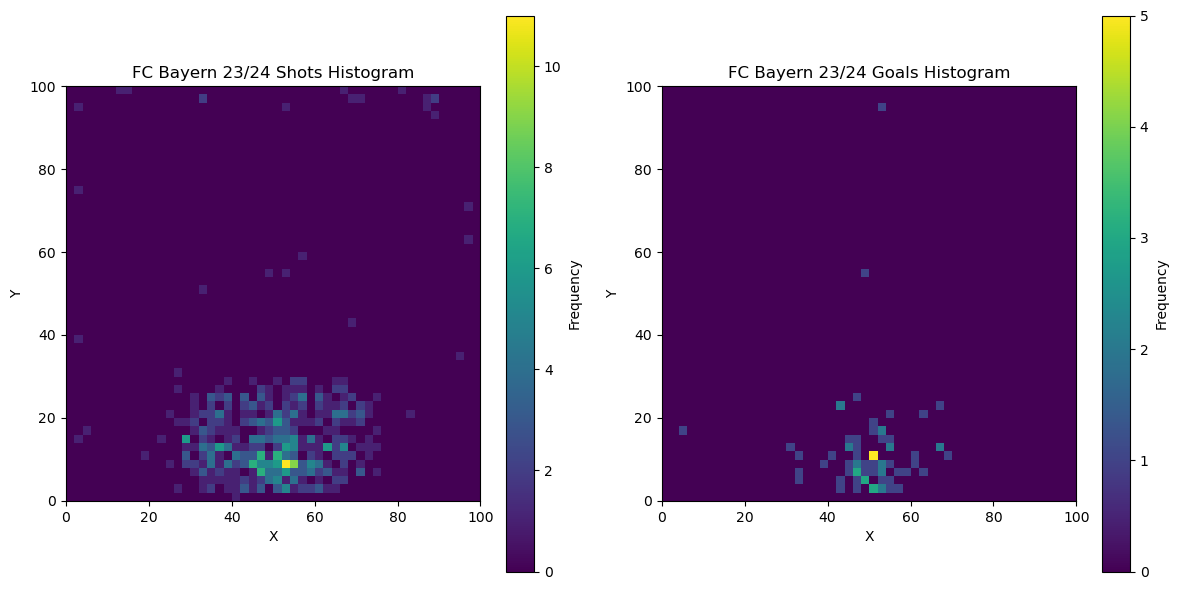

In [62]:

# Plotting the Shots histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(H_Shot[0], extent=[0, 100, 0, 100], origin='lower', cmap='viridis')
plt.title('FC Bayern 23/24 Shots Histogram')
plt.colorbar(label='Frequency')
plt.xlabel('X')
plt.ylabel('Y')

# Plotting the Goals histogram
plt.subplot(1, 2, 2)
plt.imshow(H_Goal[0], extent=[0, 100, 0, 100], origin='lower', cmap='viridis')
plt.title('FC Bayern 23/24 Goals Histogram')
plt.colorbar(label='Frequency')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

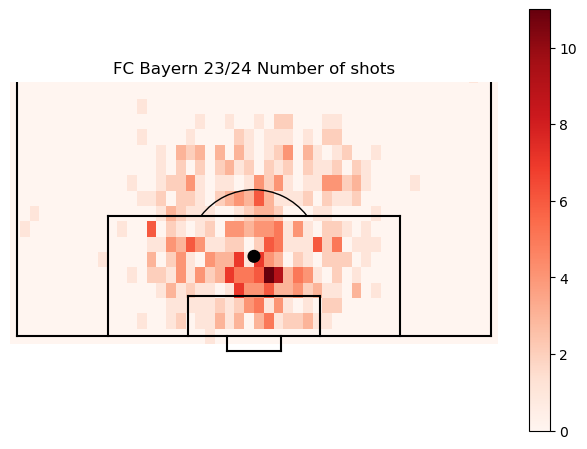

In [63]:
#Plot the number of shots from different points
(fig,ax) = FCPython.createGoalMouth()
pos=ax.imshow(H_Shot[0], extent=[-1,66,104,-1], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('FC Bayern 23/24 Number of shots')
plt.xlim((-1,66))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

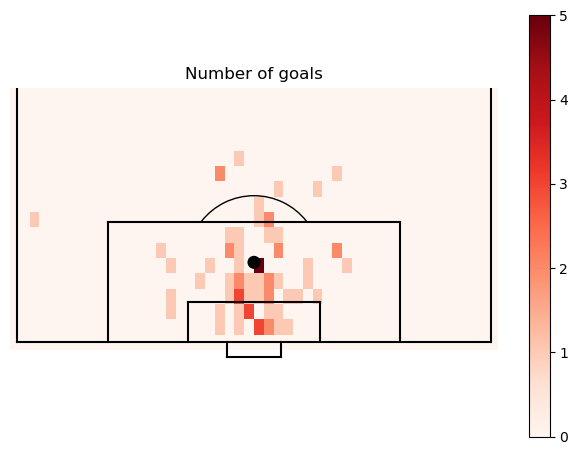

In [16]:
(fig,ax) = FCPython.createGoalMouth()
pos=ax.imshow(H_Goal[0], extent=[-1,66,104,-1], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('FC Bayern 23/24 Number of goals')
plt.xlim((-1,66))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

C:\Users\santo\AppData\Local\Temp\ipykernel_19144\107698514.py:3: RuntimeWarning: invalid value encountered in divide
  pos=ax.imshow(H_Goal[0]/H_Shot[0], extent=[-1,66,104,-1], aspect='auto',cmap=plt.cm.Reds,vmin=0, vmax=0.5)


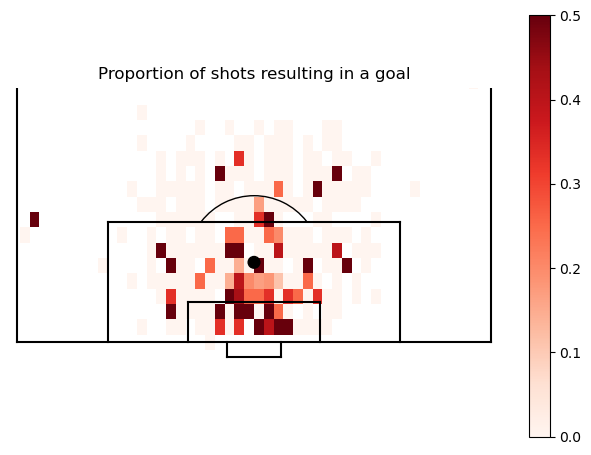

In [17]:
#Plot the probability of scoring from different points
(fig,ax) = FCPython.createGoalMouth()
pos=ax.imshow(H_Goal[0]/H_Shot[0], extent=[-1,66,104,-1], aspect='auto',cmap=plt.cm.Reds,vmin=0, vmax=0.5)
fig.colorbar(pos, ax=ax)
ax.set_title('FC Bayern 23/24 Proportion of shots resulting in a goal')
plt.xlim((-1,66))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [19]:
#Getting first 200 shots
shots_200=shots_model.iloc[:200]


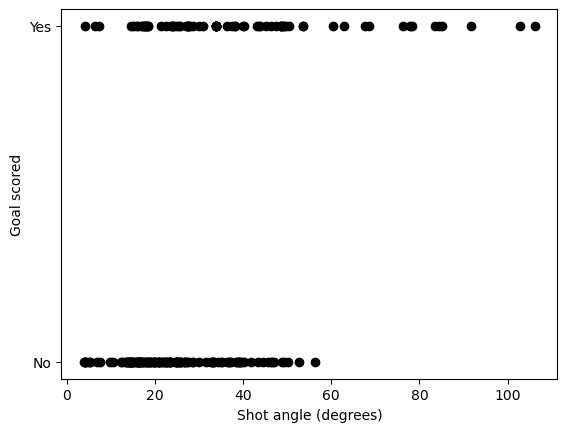

In [20]:
#Plotting first 200 shots goal angle
fig,ax=plt.subplots(num=1)
ax.plot(shots_200['Angle']*180/np.pi, shots_200['Goal'], linestyle='none', marker= '.', markersize= 12, color='black')
ax.set_ylabel('Goal scored')
ax.set_xlabel("Shot angle (degrees)")
plt.ylim((-0.05,1.05))
ax.set_yticks([0,1])
ax.set_yticklabels(['No','Yes'])
plt.show()

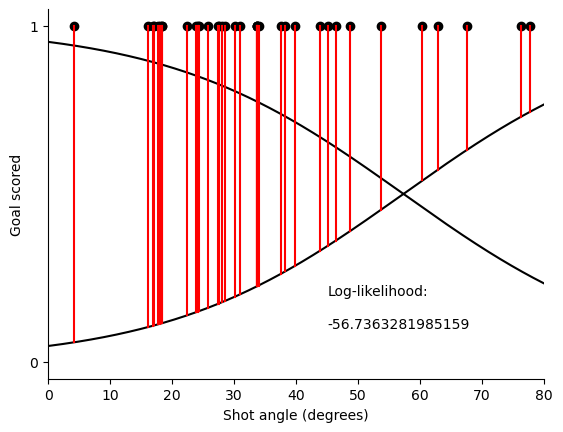

In [32]:
#Now lets look at the likelihood of model given data
xG=1/(1+np.exp(b[0]+b[1]*shots_model['Angle'])) 
shots_model = shots_model.assign(xG=xG)
shots_40=shots_model.iloc[:40]
fig,ax=plt.subplots(num=1)
ax.plot(shots_40['Angle']*180/np.pi, shots_40['Goal'], linestyle='none', marker= '.', markerSize= 12, color='black')
ax.plot(x, y, linestyle='solid', color='black')
ax.plot(x, 1-y, linestyle='solid', color='black')
loglikelihood=0
for item,shot in shots_40.iterrows():
    ang=shot['Angle']*180/np.pi
    if shot['Goal']==1:
        loglikelihood=loglikelihood+np.log(shot['xG'])
        ax.plot([ang,ang],[shot['Goal'],shot['xG']], color='red')
    else:
        loglikelihood=loglikelihood+np.log(1 - shot['xG'])
        ax.plot([ang,ang],[shot['Goal'],1-shot['xG']], color='blue')
    
ax.set_ylabel('Goal scored')
ax.set_xlabel("Shot angle (degrees)")
plt.ylim((-0.05,1.05))
plt.xlim((0,80))
plt.text(45,0.2,'Log-likelihood:') 
plt.text(45,0.1,str(loglikelihood))
ax.set_yticks([0,1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.savefig('Output/LikelihoodExample.pdf', dpi=None, bbox_inches="tight")   
plt.show()

                   Generalized Linear Model Regression Results                    
Dep. Variable:     ['Goal[0]', 'Goal[1]']   No. Observations:                  566
Model:                                GLM   Df Residuals:                      564
Model Family:                    Binomial   Df Model:                            1
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -198.02
Date:                    Wed, 31 Jan 2024   Deviance:                       396.03
Time:                            14:56:32   Pearson chi2:                     559.
No. Iterations:                         5   Pseudo R-squ. (CS):            0.07308
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

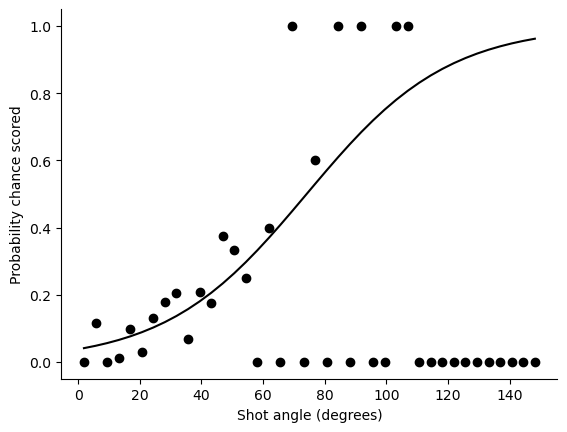

In [39]:
#Make single variable model of angle
#Using logistic regression we find the optimal values of b
#This process minimizes the loglikelihood
test_model = smf.glm(formula="Goal ~ Angle" , data=shots_model, 
                           family=sm.families.Binomial()).fit()
print(test_model.summary())        
b=test_model.params


xGprob=1/(1+np.exp(b[0]+b[1]*midangle*np.pi/180)) 
fig,ax=plt.subplots(num=1)
ax.plot(midangle, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
ax.plot(midangle, xGprob, linestyle='solid', color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Shot angle (degrees)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

                   Generalized Linear Model Regression Results                    
Dep. Variable:     ['Goal[0]', 'Goal[1]']   No. Observations:                  566
Model:                                GLM   Df Residuals:                      564
Model Family:                    Binomial   Df Model:                            1
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -210.06
Date:                    Wed, 31 Jan 2024   Deviance:                       420.13
Time:                            14:57:51   Pearson chi2:                 2.27e+03
No. Iterations:                         6   Pseudo R-squ. (CS):            0.03276
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

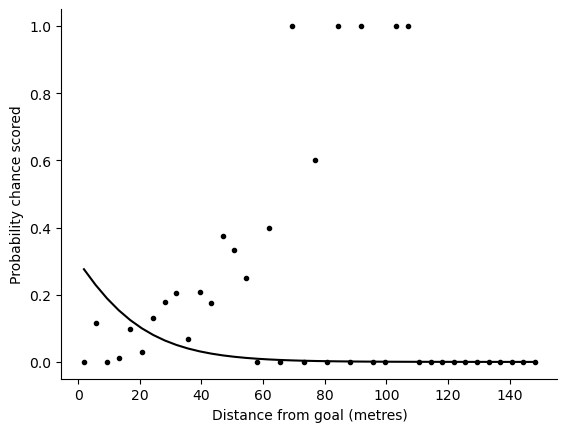

In [41]:
#Now lets look at distance from goal
#Show empirically how distance from goal predicts probability of scoring
shotcount_dist = np.histogram(shots_model['Angle']*180/np.pi, bins=40, range=[0, 150])
goalcount_dist = np.histogram(goals_only['Angle']*180/np.pi, bins=40, range=[0, 150])

# Convert to float to avoid casting issues
shotcount_dist_float = shotcount_dist[0].astype(float)
goalcount_dist_float = goalcount_dist[0].astype(float)

# Avoid division by zero
prob_goal = np.divide(goalcount_dist_float, shotcount_dist_float, out=np.zeros_like(goalcount_dist_float), where=shotcount_dist_float != 0)

distance=shotcount_dist[1]
middistance= (distance[:-1] + distance[1:])/2
fig,ax=plt.subplots(num=1)
ax.plot(middistance, prob_goal, linestyle='none', marker= '.', color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Distance from goal (metres)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


#Make single variable model of distance
test_model = smf.glm(formula="Goal ~ Distance" , data=shots_model, 
                           family=sm.families.Binomial()).fit()
print(test_model.summary())        
b=test_model.params
xGprob=1/(1+np.exp(b[0]+b[1]*middistance)) 
ax.plot(middistance, xGprob, linestyle='solid', color='black')
plt.show()

In [42]:
#Make single variable model of distance
test_model = smf.glm(formula="Goal ~ Distance" , data=shots_model, 
                           family=sm.families.Binomial()).fit()
print(test_model.summary())        
b=test_model.params
xGprob=1/(1+np.exp(b[0]+b[1]*middistance)) 
ax.plot(middistance, xGprob, linestyle='solid', color='black')
plt.show()

                   Generalized Linear Model Regression Results                    
Dep. Variable:     ['Goal[0]', 'Goal[1]']   No. Observations:                  566
Model:                                GLM   Df Residuals:                      564
Model Family:                    Binomial   Df Model:                            1
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -210.06
Date:                    Wed, 31 Jan 2024   Deviance:                       420.13
Time:                            14:58:22   Pearson chi2:                 2.27e+03
No. Iterations:                         6   Pseudo R-squ. (CS):            0.03276
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

                   Generalized Linear Model Regression Results                    
Dep. Variable:     ['Goal[0]', 'Goal[1]']   No. Observations:                  566
Model:                                GLM   Df Residuals:                      563
Model Family:                    Binomial   Df Model:                            2
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -202.97
Date:                    Wed, 31 Jan 2024   Deviance:                       405.94
Time:                            14:59:10   Pearson chi2:                     638.
No. Iterations:                         6   Pseudo R-squ. (CS):            0.05670
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

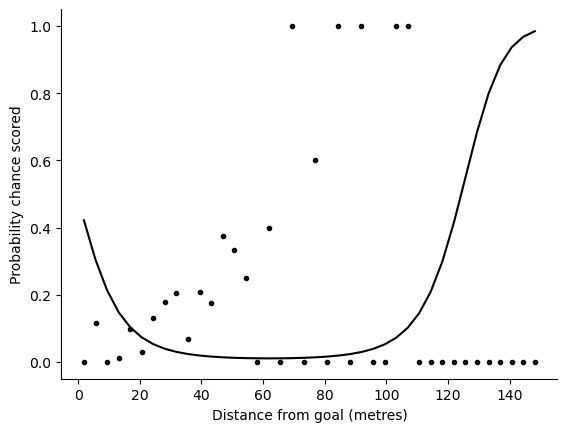

In [43]:
#Adding distance squared
squaredD = shots_model['Distance']**2
shots_model = shots_model.assign(D2=squaredD)
test_model = smf.glm(formula="Goal ~ Distance + D2" , data=shots_model, 
                           family=sm.families.Binomial()).fit()
print(test_model.summary())        
b=test_model.params
xGprob=1/(1+np.exp(b[0]+b[1]*middistance+b[2]*pow(middistance,2))) 
fig,ax=plt.subplots(num=1)
ax.plot(middistance, prob_goal, linestyle='none', marker= '.', color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Distance from goal (metres)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.plot(middistance, xGprob, linestyle='solid', color='black')
plt.show()

In [46]:
#Adding even more variables to the model.
squaredX = shots_model['x']**2
shots_model = shots_model.assign(X2=squaredX)
squaredC = shots_model['C']**2
shots_model = shots_model.assign(C2=squaredC)
AX = shots_model['Angle']*shots_model['x']
shots_model = shots_model.assign(AX=AX)


In [47]:
# A general model for fitting goal probability
# List the model variables you want here
model_variables = ['Angle','Distance']
model=''
for v in model_variables[:-1]:
    model = model  + v + ' + '
model = model + model_variables[-1]

In [48]:
#Fit the model
test_model = smf.glm(formula="Goal ~ " + model, data=shots_model, 
                           family=sm.families.Binomial()).fit()
print(test_model.summary())        
b=test_model.params

                   Generalized Linear Model Regression Results                    
Dep. Variable:     ['Goal[0]', 'Goal[1]']   No. Observations:                  566
Model:                                GLM   Df Residuals:                      563
Model Family:                    Binomial   Df Model:                            2
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -198.00
Date:                    Wed, 31 Jan 2024   Deviance:                       396.00
Time:                            15:00:49   Pearson chi2:                     556.
No. Iterations:                         6   Pseudo R-squ. (CS):            0.07313
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

In [56]:
#Return xG value for more general model
def calculate_xG(sh):    
   bsum=b[0]
   for i,v in enumerate(model_variables):
       bsum=bsum+b[i+1]*sh[v]
   xG = 1/(1+np.exp(bsum)) 
   return xG   

 

In [57]:
#Add an xG to my dataframe
xG=shots_model.apply(calculate_xG, axis=1) 
shots_model = shots_model.assign(xG=xG)

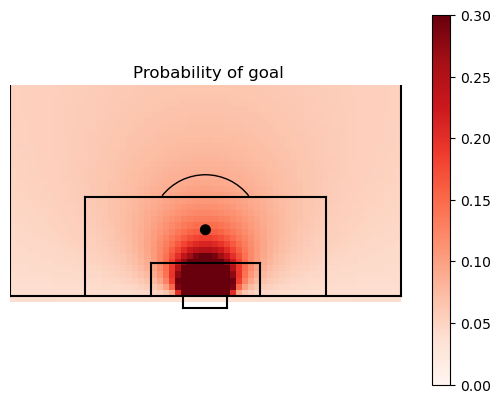

In [58]:
#Create a 2D map of xG
pgoal_2d=np.zeros((65,65))
for x in range(65):
    for y in range(65):
        sh=dict()
        a = np.arctan(7.32 *x /(x**2 + abs(y-65/2)**2 - (7.32/2)**2))
        if a<0:
            a = np.pi + a
        sh['Angle'] = a
        sh['Distance'] = np.sqrt(x**2 + abs(y-65/2)**2)
        sh['D2'] = x**2 + abs(y-65/2)**2
        sh['X'] = x
        sh['AX'] = x*a
        sh['X2'] = x**2
        sh['C'] = abs(y-65/2)
        sh['C2'] = (y-65/2)**2
        
        pgoal_2d[x,y] =  calculate_xG(sh)

(fig,ax) = FCPython.createGoalMouth()
pos=ax.imshow(pgoal_2d, extent=[-1,65,65,-1], aspect='auto',cmap=plt.cm.Reds,vmin=0, vmax=0.3)
fig.colorbar(pos, ax=ax)
ax.set_title('Probability of goal')
plt.xlim((0,66))
plt.ylim((-3,35))
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [59]:
#Mcfaddens Rsquared for Logistic regression
null_model = smf.glm(formula="Goal ~ 1 ", data=shots_model, 
                           family=sm.families.Binomial()).fit()
1-test_model.llf/null_model.llf

0.09791261393792039

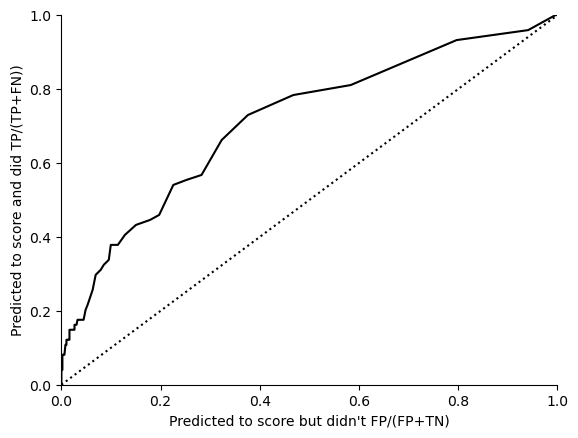

In [61]:
#ROC curve
numobs=100
TP=np.zeros(numobs)
FP=np.zeros(numobs)
TN=np.zeros(numobs)
FN=np.zeros(numobs)


for i,threshold in enumerate(np.arange(0,1,1/numobs)):
    for j,shot in shots_model.iterrows():
        if (shot['Goal']==1): 
            if(shot['xG']>threshold):
                TP[i] = TP[i] + 1
            else:
                FN[i] = FN[i] + 1
        if (shot['Goal']==0): 
            if(shot['xG']>threshold):
                FP[i] = FP[i] + 1
            else:
                TN[i] = TN[i] + 1
     

fig,ax=plt.subplots(num=1)
ax.plot(FP/(FP+TN), TP/(TP+FN), color='black')
ax.plot([0,1], [0,1], linestyle='dotted', color='black')
ax.set_ylabel("Predicted to score and did TP/(TP+FN))")
ax.set_xlabel("Predicted to score but didn't FP/(FP+TN)")
plt.ylim((0.00,1.00))
plt.xlim((0.00,1.00))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)   
